<h1>APP ANALYSIS WHILE STUDYING</h1>

In [27]:
import pandas as pd

In [28]:
usage = pd.read_csv('DATA/CLASS_USAGExSTUDY.csv')

In [29]:
usage.head()

,Unnamed: 0,userid,name,start_timestamp,end_timestamp,study
0,0,1,Social,2020-11-13 00:38:55.823,2020-11-13 00:38:55.823,True
1,2,1,Productivity,2020-11-13 00:39:06.495,2020-11-13 00:39:06.495,True
2,4,1,Productivity,2020-11-13 00:39:16.494,2020-11-13 00:39:21.514,True
3,6,1,Productivity,2020-11-13 08:10:02.180,2020-11-13 08:10:22.953,True
4,8,1,Productivity,2020-11-13 08:34:02.181,2020-11-13 09:05:48.118,True


In [30]:
usage = usage.drop("Unnamed: 0", axis=1)

In [31]:
usage

,userid,name,start_timestamp,end_timestamp,study
0,1,Social,2020-11-13 00:38:55.823,2020-11-13 00:38:55.823,True
1,1,Productivity,2020-11-13 00:39:06.495,2020-11-13 00:39:06.495,True
2,1,Productivity,2020-11-13 00:39:16.494,2020-11-13 00:39:21.514,True
3,1,Productivity,2020-11-13 08:10:02.180,2020-11-13 08:10:22.953,True
4,1,Productivity,2020-11-13 08:34:02.181,2020-11-13 09:05:48.118,True
...,...,...,...,...,...
217948,264,Chat,2020-12-11 23:17:17.942,2020-12-11 23:18:28.018,True
217949,264,Media,2020-12-11 23:18:33.020,2020-12-11 23:18:58.043,True
217950,264,Altro,2020-12-11 23:19:03.038,2020-12-11 23:19:58.073,True
217951,264,Altro,2020-12-11 23:20:03.076,2020-12-11 23:20:03.076,True


In [32]:
usage['start_timestamp'] = pd.to_datetime(usage['start_timestamp'])
usage['end_timestamp'] = pd.to_datetime(usage['end_timestamp'])
usage['duration'] = (usage['end_timestamp'] - usage['start_timestamp']).dt.total_seconds()

In [33]:
def transformINT(duration):
    return int(duration)
usage['duration'] = usage['duration'].map(transformINT)

In [34]:
encodiz = dict()
i=0
lista = ['Chat','Social', 'Media', 'Productivity', 'Health & Fitness', 'Altro', 'Finanza', 'Shopping', 'Game']
for el in lista:
    encodiz[el] = i
    i+=1
print("This is the encoding:", encodiz)
def encodeName(name):
    return encodiz[name]
usage['name'] = usage['name'].map(encodeName)
usage.head()

This is the encoding: {'Chat': 0, 'Social': 1, 'Media': 2, 'Productivity': 3, 'Health & Fitness': 4, 'Altro': 5, 'Finanza': 6, 'Shopping': 7, 'Game': 8}


,userid,name,start_timestamp,end_timestamp,study,duration
0,1,1,2020-11-13 00:38:55.823,2020-11-13 00:38:55.823,True,0
1,1,3,2020-11-13 00:39:06.495,2020-11-13 00:39:06.495,True,0
2,1,3,2020-11-13 00:39:16.494,2020-11-13 00:39:21.514,True,5
3,1,3,2020-11-13 08:10:02.180,2020-11-13 08:10:22.953,True,20
4,1,3,2020-11-13 08:34:02.181,2020-11-13 09:05:48.118,True,1905


In [35]:
mio_dizionario = encodiz.copy()
invDiz = {valore: chiave for chiave, valore in mio_dizionario.items()}

In [36]:
usage

,userid,name,start_timestamp,end_timestamp,study,duration
0,1,1,2020-11-13 00:38:55.823,2020-11-13 00:38:55.823,True,0
1,1,3,2020-11-13 00:39:06.495,2020-11-13 00:39:06.495,True,0
2,1,3,2020-11-13 00:39:16.494,2020-11-13 00:39:21.514,True,5
3,1,3,2020-11-13 08:10:02.180,2020-11-13 08:10:22.953,True,20
4,1,3,2020-11-13 08:34:02.181,2020-11-13 09:05:48.118,True,1905
...,...,...,...,...,...,...
217948,264,0,2020-12-11 23:17:17.942,2020-12-11 23:18:28.018,True,70
217949,264,2,2020-12-11 23:18:33.020,2020-12-11 23:18:58.043,True,25
217950,264,5,2020-12-11 23:19:03.038,2020-12-11 23:19:58.073,True,55
217951,264,5,2020-12-11 23:20:03.076,2020-12-11 23:20:03.076,True,0


In [37]:
app_data = pd.DataFrame({
    'userid': usage['userid'],
    'category': usage['name'],
    'duration': usage['duration']
})

user_app_matrix = app_data.pivot_table(index='userid', columns='category', values='duration', aggfunc='sum', fill_value=0)
user_app_matrix.head()

category,0,1,2,3,4,5,6,7,8
userid,,,,,,,,,
1,731015,102292,27460,95988,1661,23625,540,22256,52669
3,134049,35334,13024,41946,0,11943,37,5360,13465
5,37532,243376,264030,230015,3674,35599,690,16078,81265
8,353519,134695,11141,59783,0,22750,1863,75,40454
9,69246,192209,75343,91140,0,22370,405,160,0


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
user_app_matrix_scaled = scaler.fit_transform(user_app_matrix)
user_app_matrix_scaled_df = pd.DataFrame(user_app_matrix_scaled, columns=user_app_matrix.columns)
user_app_matrix_scaled_df.head()

category,0,1,2,3,4,5,6,7,8
0,3.197856,-0.356916,-0.698886,-0.261592,-0.188119,-0.526665,-0.191183,1.165421,0.342223
1,-0.468439,-1.020481,-0.843964,-0.652040,-0.211052,-0.839043,-0.224998,-0.275361,-0.252300
2,-1.061203,1.041252,1.678570,0.706741,-0.160326,-0.206479,-0.181099,0.638601,0.775878
3,0.879446,-0.035796,-0.862887,-0.523170,-0.211052,-0.550063,-0.102241,-0.726032,0.156985
4,-0.866430,0.534178,-0.217677,-0.296618,-0.211052,-0.560224,-0.200258,-0.718783,-0.456495


In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
user_app_matrix['cluster'] = kmeans.fit_predict(user_app_matrix_scaled)
user_app_matrix

/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


category,0,1,2,3,4,5,6,7,8,cluster
userid,,,,,,,,,,
1,731015,102292,27460,95988,1661,23625,540,22256,52669,3
3,134049,35334,13024,41946,0,11943,37,5360,13465,0
5,37532,243376,264030,230015,3674,35599,690,16078,81265,0
8,353519,134695,11141,59783,0,22750,1863,75,40454,0
9,69246,192209,75343,91140,0,22370,405,160,0,0
...,...,...,...,...,...,...,...,...,...,...
254,586612,305654,37548,43217,2671,33060,1430,20411,0,3
255,190707,130157,11234,28147,0,12392,0,115,0,0
256,172617,157025,19843,127987,10,56007,793,34856,39309,3


In [40]:
cluster_means = user_app_matrix.groupby('cluster').mean()
print(cluster_means)

category              0              1              2              3  \
cluster                                                                
0         165451.217391  113280.652174  102696.608696  118677.913043   
1         212985.000000   92082.000000   45991.000000  177998.000000   
2         238734.000000  323226.000000   65103.000000   36280.000000   
3         317323.842105  191597.631579   87582.421053  167557.894737   

category              4             5              6             7  \
cluster                                                              
0           5177.065217  29075.195652    1671.173913   3615.282609   
1          39975.000000  25823.000000  120761.000000   9428.000000   
2         586322.000000  16057.000000     195.000000   1825.000000   
3           8407.315789  80165.736842    1520.368421  20943.000000   

category             8  
cluster                 
0         31360.978261  
1             0.000000  
2           740.000000  
3         30184.10526

In [41]:
clustered_users =  user_app_matrix.groupby('userid')
dizio_clusters = user_app_matrix['cluster'].to_dict()
cluster_stats = user_app_matrix.groupby('cluster').describe()
print(cluster_stats)

category     0                                                              \
         count           mean            std       min       25%       50%   
cluster                                                                      
0         46.0  165451.217391  127091.734232    9920.0   60041.5  138163.5   
1          1.0  212985.000000            NaN  212985.0  212985.0  212985.0   
2          1.0  238734.000000            NaN  238734.0  238734.0  238734.0   
3         19.0  317323.842105  202551.604635   40033.0  182001.5  276632.0   

category                         1                 ...        7           \
               75%       max count           mean  ...      75%      max   
cluster                                            ...                     
0         253065.5  514371.0  46.0  113280.652174  ...   5894.0  16078.0   
1         212985.0  212985.0   1.0   92082.000000  ...   9428.0   9428.0   
2         238734.0  238734.0   1.0  323226.000000  ...   1825.0   1825.0 

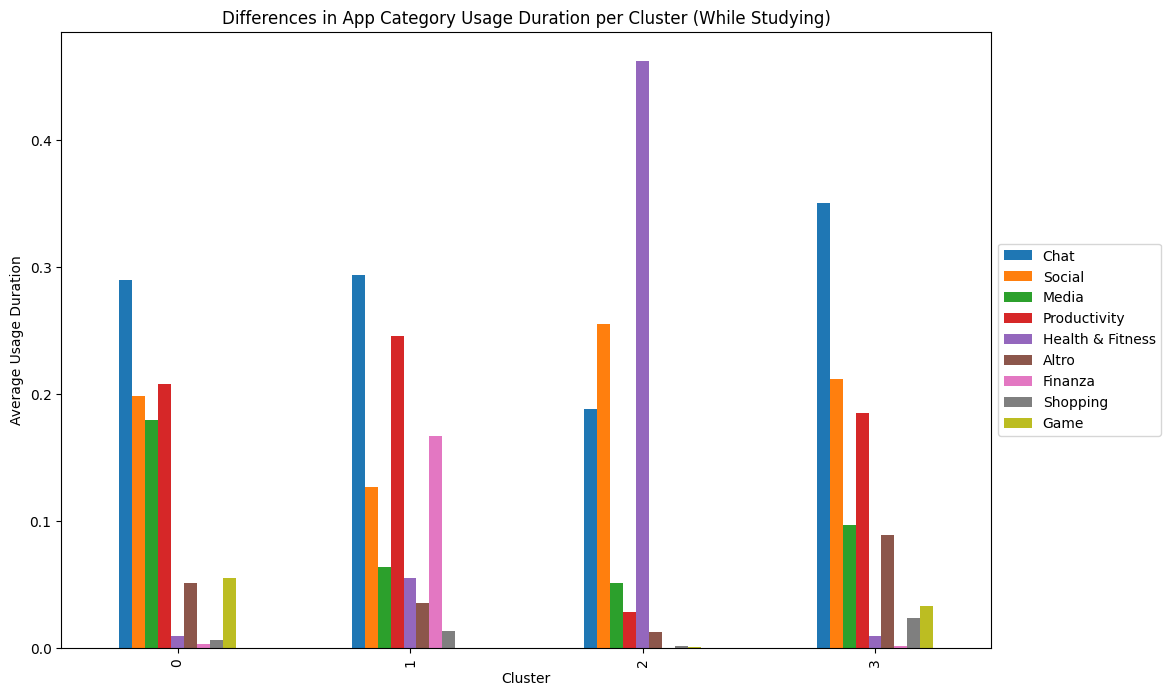

In [43]:
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

ax = cluster_means_normalized.plot(kind='bar', figsize=(12, 8))
ax.legend(labels=[invDiz[int(label.get_text())] for label in ax.get_legend().get_texts()], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Differences in App Category Usage Duration per Cluster (While Studying)')
plt.xlabel('Cluster')
plt.ylabel('Average Usage Duration')
plt.show()

In [ ]:
cluster_totals = cluster_means.sum(axis=1)
cluster_percentages = cluster_means.div(cluster_totals, axis=0) * 100
ax = cluster_percentages.plot(kind='bar', figsize=(12, 8), stacked=True)

ax.legend(labels=[invDiz[int(label.get_text())] for label in ax.get_legend().get_texts()], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Differences in App Category Usage Duration per Cluster (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Total Usage Duration')

plt.show()

In [ ]:
# Calcolare la media di utilizzo delle app per ogni cluster
cluster_means = user_app_matrix.groupby('cluster').mean()

# Normalizzare i valori dividendo per la somma totale di ogni cluster
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

# Plot
ax = cluster_means_normalized.T.plot(kind='bar', stacked=True)

# Mappare i numeri alle etichette desiderate sull'asse x usando invDiz
new_labels = [invDiz[int(label.get_text().split()[-1])] for label in ax.get_xticklabels()]
ax.set_xticklabels(new_labels)

plt.title('Media Normalizzata di Utilizzo delle App per Cluster')
plt.xlabel('Categoria')
plt.ylabel('Media Normalizzata')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

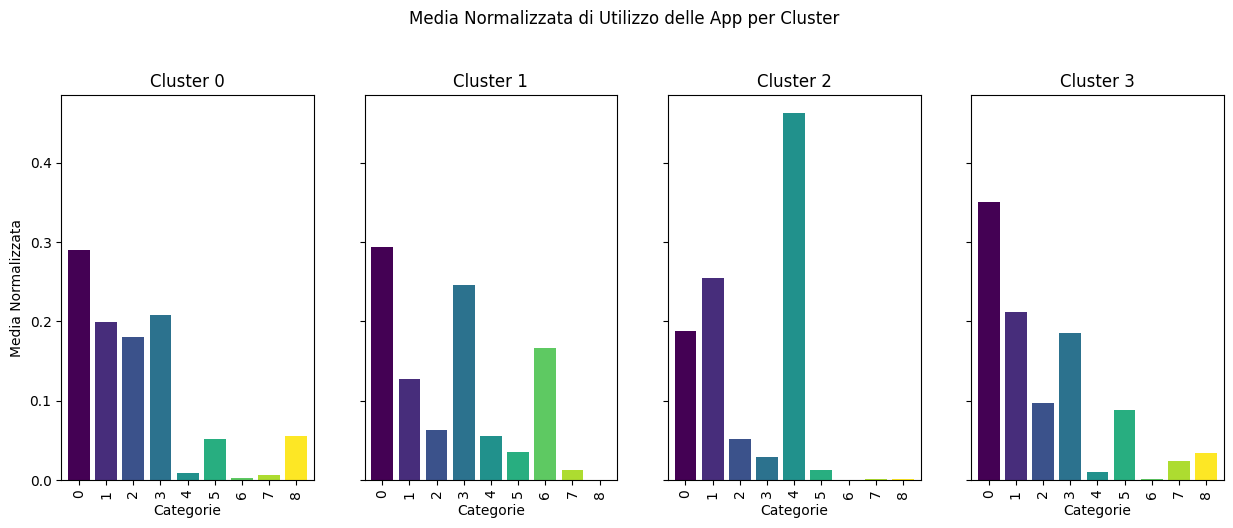

In [16]:
import numpy as np
# Calcolare la media di utilizzo delle app per ogni cluster
cluster_means = user_app_matrix.groupby('cluster').mean()

# Normalizzare i valori dividendo per la somma totale di ogni cluster
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=len(cluster_means_normalized), figsize=(15, 5), sharey=True)

for i, (cluster, data) in enumerate(cluster_means_normalized.iterrows()):
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))  # Colormap per variare i colori
    data.plot(kind='bar', ax=axes[i], color=colors, width=0.8)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Categorie')
    try:
        axes[i].set_xticklabels(new_labels, rotation=45, ha='right', fontsize=10)
    except:
        pass
    axes[i].set_ylabel('Media Normalizzata')

plt.suptitle('Media Normalizzata di Utilizzo delle App per Cluster', y=1.05)
plt.show()

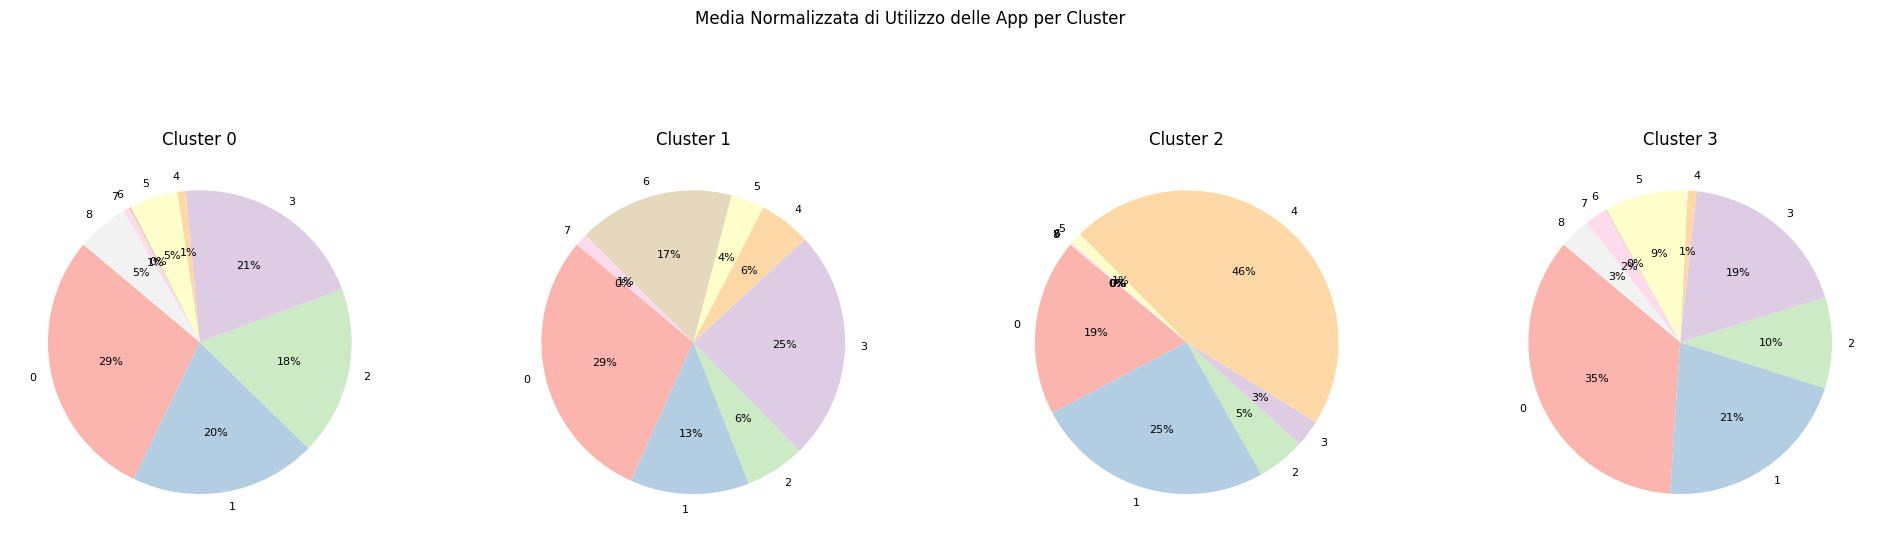

In [24]:
import numpy as np

# Calcolare la media di utilizzo delle app per ogni cluster
cluster_means = user_app_matrix.groupby('cluster').mean()

# Normalizzare i valori dividendo per la somma totale di ogni cluster
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

# Determinare il numero di cluster
num_clusters = len(cluster_means_normalized)

# Aumentare la larghezza della figura per evitare la sovrapposizione delle percentuali
fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(6 * num_clusters, 6), subplot_kw=dict(aspect="equal"))

for i, (cluster, data) in enumerate(cluster_means_normalized.iterrows()):
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(data)))  # Colormap per variare i colori
    # Usare i nomi delle categorie come etichette se new_labels è definito
    labels = new_labels if 'new_labels' in locals() else data.index
    data.plot(kind='pie', ax=axes[i], colors=colors, autopct='%1.0f%%', startangle=140, labels=labels, textprops={'fontsize': 8})
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_ylabel('')  # Rimuovere l'etichetta y

# Aumentare lo spazio tra i diagrammi a torta se necessario
plt.subplots_adjust(wspace=0.3)

plt.suptitle('Media Normalizzata di Utilizzo delle App per Cluster', y=1.05)
plt.show()

In [18]:
user_app_matrix['cluster']

userid
1      3
3      0
5      0
8      0
9      0
      ..
254    3
255    0
256    3
262    0
264    3
Name: cluster, Length: 67, dtype: int32

In [25]:
user_app_matrix['cluster'].to_csv("DATA/clusters_study.csv")

In [26]:
user_app_matrix.to_csv("DATA/user_app_matrix_study.csv")